<a href="https://colab.research.google.com/github/SamwelJane/Student-debt-crisis/blob/master/Repayment__rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gainful Employment Informational Rates, 2011

The Gainful Employment Informational Rates, 2011 (GE2011), is a collection that is part of the Gainful Employment (GE) program; program data is available since 2011 at . GE2011 (https://studentaid.ed.gov/sa/about/data-center/school/ge) is a universe data collection regarding repayment rate and debt-to-earnings ratios, as in order to be eligible for Title IV student assistance programs under the Higher Education Act (HEA), postsecondary institutions' educational programs must be proven to lead to a degree or to prepare students for gainful employment in a recognized occupation. With very few exceptions, all educational programs offered at for-profit institutions must lead to gainful employment in a recognized occupation. The GE2011 rates are for informational purposes only and, as such, do not invoke any regulatory requirements, sanctions, or other adverse action. These informational rates were prepared in advance of the July 1, 2012 effective date of the applicable regulations for the years in which programs that fail the debt measures will be required to provide debt warnings and may lose eligibility after failing three out of four consecutive years. Key statistics produced from GE2011 were information on repayment rates and debt-to-earnings ratios.

## columns description


"N/A" is displayed when a debt measure was not calculated because there were fewer than 31 students in the relevant cohort

In [3]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data source: 
https://studentaid.ed.gov/sa/sites/default/files/GE2011InformationalRates102512_0.XLS

In [0]:
# loading data
GEI= pd.read_excel('GE2011InformationalRates102512_0 copy.xls')

In [6]:
# bio info of the dataset
GEI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13765 entries, 0 to 13764
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   OPEID                                            13765 non-null  int64  
 1   Institution Name                                 13765 non-null  object 
 2   Street Address                                   13765 non-null  object 
 3   City                                             13765 non-null  object 
 4   State                                            13765 non-null  object 
 5   ZIP                                              13760 non-null  object 
 6   Institution Type                                 13765 non-null  object 
 7   CIP Code                                         13765 non-null  int64  
 8   CIP Name                                         13765 non-null  object 
 9   Credential Level            

In [7]:
# Checking null vales
GEI.isnull().sum()

OPEID                                                 0
Institution Name                                      0
Street Address                                        0
City                                                  0
State                                                 0
ZIP                                                   5
Institution Type                                      0
CIP Code                                              0
CIP Name                                              0
Credential Level                                      0
Repayment Rate                                     9150
Repayment Rate Numerator                           9150
Repayment Rate Denominator                         9150
Debt to Earnings Annual Rate                       8260
Debt to Earnings Annual Rate Numerator             8260
Debt to Earnings Annual Rate Denominator           8260
Debt to Earnings Discretionary Rate                8260
Debt to Earnings Discretionary Rate Numerator   

In [0]:
# renaming the columns 
df = GEI.rename(columns={"OPEID":"OPEID","Institution Name":"Institutio_Nname","Street Address":"Street_Address","City":"City","State":"State","ZIP":"ZIP","Institution Type":"Institution_Type","CIP Code":"CIP_Code", 
        "CIP Name":"CIP_Name", "Credential Level":"Credential_Level","Repayment Rate":"Repayment_Rate","Repayment Rate Numerator":"Repayment_Rate_Numerator",
       "Repayment Rate Denominator":"Repayment_Rate_Denominator", "Debt to Earnings Annual Rate":"Debt_to_Earnings_Annual Rate",
       "Debt to Earnings Annual Rate Numerator":"Debt to Earnings Annual Rate Numerator",
       "Debt to Earnings Annual Rate Denominator":"Debt_to_Earnings_Annual_Rate_Denominator",
       "Debt to Earnings Discretionary Rate":"Debt_to_Earnings_Discretionary_Rate",
       "Debt to Earnings Discretionary Rate Numerator":"Debt_to_Earnings_Discretionary_Rate_Numerator",
       "Debt to Earnings Discretionary Rate Denominator":"Debt_to_Earnings_Discretionary_Rate_Denominator",
       "Median Private Loans":"Median_Private_Loans", "Median Institution Loans":"Median Institution Loans",
       "Median Title IV Loans":"Median_Title_IV_Loans",
       "Median Title IV Loans (2010-2011 Award Year":"Median_Title_IV_Loans_(2010-2011_Award_Year"})

In [9]:
df.columns

Index(['OPEID', 'Institutio_Nname', 'Street_Address', 'City', 'State', 'ZIP',
       'Institution_Type', 'CIP_Code', 'CIP_Name', 'Credential_Level',
       'Repayment_Rate', 'Repayment_Rate_Numerator',
       'Repayment_Rate_Denominator', 'Debt_to_Earnings_Annual Rate',
       'Debt to Earnings Annual Rate Numerator',
       'Debt_to_Earnings_Annual_Rate_Denominator',
       'Debt_to_Earnings_Discretionary_Rate',
       'Debt_to_Earnings_Discretionary_Rate_Numerator',
       'Debt_to_Earnings_Discretionary_Rate_Denominator',
       'Median_Private_Loans', 'Median Institution Loans',
       'Median_Title_IV_Loans',
       'Median Title IV Loans (2010-2011 Award Year)'],
      dtype='object')

In [10]:
# statistical summary of the dataframe
df.describe()

,OPEID,CIP_Code,Repayment_Rate,Repayment_Rate_Numerator,Repayment_Rate_Denominator,Debt_to_Earnings_Annual Rate,Debt to Earnings Annual Rate Numerator,Debt_to_Earnings_Annual_Rate_Denominator,Debt_to_Earnings_Discretionary_Rate,Debt_to_Earnings_Discretionary_Rate_Numerator,Debt_to_Earnings_Discretionary_Rate_Denominator,Median_Private_Loans,Median Institution Loans,Median_Title_IV_Loans,Median Title IV Loans (2010-2011 Award Year)
count,13765.000000,13765.000000,4615.000000,4.615000e+03,4.615000e+03,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,12817.000000,12817.000000,12817.000000,12817.000000
mean,16131.162296,386874.887105,39.580282,8.674683e+05,2.114574e+06,4.566623,1020.210173,25449.245413,50.033039,1020.210173,10055.984559,230.408052,134.364750,7751.786690,4002.221347
std,12318.430004,170402.315857,16.953621,5.648609e+06,1.187953e+07,4.685302,1115.805330,16314.554098,99.783809,1115.805330,15220.222071,2348.600638,988.352835,11395.487406,4732.297744
min,1007.000000,10000.000000,3.770000,0.000000e+00,0.000000e+00,0.000000,0.000000,1552.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5256.000000,150803.000000,26.665000,1.129390e+05,3.166960e+05,0.000000,0.000000,15244.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11031.000000,500406.000000,37.780000,2.268850e+05,6.151410e+05,3.960000,845.000000,20674.000000,15.990000,845.000000,3919.000000,0.000000,0.000000,5024.000000,2848.000000
75%,25494.000000,510909.000000,50.770000,5.103655e+05,1.364179e+06,6.760000,1449.000000,30998.000000,100.000000,1449.000000,14243.000000,0.000000,0.000000,11075.000000,7334.000000
max,41919.000000,600199.000000,100.000000,2.565923e+08,5.329377e+08,55.740000,18626.000000,186951.000000,999.990000,18626.000000,170196.000000,152813.000000,37000.000000,255104.000000,93470.000000


In [0]:
# filling null values with zero because; 
# debt measure was not calculated and there were fewer than 31 students in the relevant cohort
df.fillna(0,inplace=True)

In [0]:
df.isnull().sum()

OPEID                                              0
Institutio_Nname                                   0
Street_Address                                     0
City                                               0
State                                              0
ZIP                                                0
Institution_Type                                   0
CIP_Code                                           0
CIP_Name                                           0
Credential_Level                                   0
Repayment_Rate                                     0
Repayment_Rate_Numerator                           0
Repayment_Rate_Denominator                         0
Debt_to_Earnings_Annual Rate                       0
Debt to Earnings Annual Rate Numerator             0
Debt_to_Earnings_Annual_Rate_Denominator           0
Debt_to_Earnings_Discretionary_Rate                0
Debt_to_Earnings_Discretionary_Rate_Numerator      0
Debt_to_Earnings_Discretionary_Rate_Denominato

In [12]:
# head count of the total number of institutions
df.Institutio_Nname.value_counts().head(15)

EVEREST COLLEGE                      174
KAPLAN COLLEGE                       137
FORTIS COLLEGE                       109
UNIVERSITY OF PHOENIX                103
HEALD COLLEGE                        102
CAPELLA UNIVERSITY                    93
EMPIRE BEAUTY SCHOOL                  85
EVEREST INSTITUTE                     85
FORTIS INSTITUTE                      82
SANFORD-BROWN COLLEGE                 76
EVEREST UNIVERSITY                    68
VATTEROTT COLLEGE                     66
LINCOLN TECHNICAL INSTITUTE           66
AMERICAN PUBLIC UNIVERSITY SYSTEM     63
LINCOLN COLLEGE OF TECHNOLOGY         61
Name: Institutio_Nname, dtype: int64

In [13]:
# level of education of the beneficiaries.
# Undergraduates certificates and associates degree benefited more from the  students loans 
df.Credential_Level.value_counts()

01 Undergraduate Certificate         10101
02 Associate's Degree                 2073
03 Bachelor's Degree                   836
04 Post Baccalaureate Certificate      363
05 Master's Degree                     309
06 Doctoral Degree                      59
07 First Professional Degree            24
Name: Credential_Level, dtype: int64

In [14]:
df.Institution_Type	.value_counts()

Public 2-3 years         4407
Proprietary 2-3 years    3025
Proprietary 4+ years     2764
Proprietary < 2 years    2057
Public 4+ years           452
Public < 2 years          441
Private 4+ years          364
Private 2-3 years         166
Private < 2 years          82
Foreign 4+ years            7
Name: Institution_Type, dtype: int64

In [0]:
# calculating the mean of repayment 
r_mean=df.Repayment_Rate.mean()
# rapayment_diff is given by repaymentrate - mean of the repayment rate
df['rapeyment_diff'] = df['Repayment_Rate']-r_mean
# creating a column that shows rapayment rate that was above or below mean of the repayment rate
df['rapeyment_diff_threshhold'] = np.where(df['rapeyment_diff']>=0,'above','below')

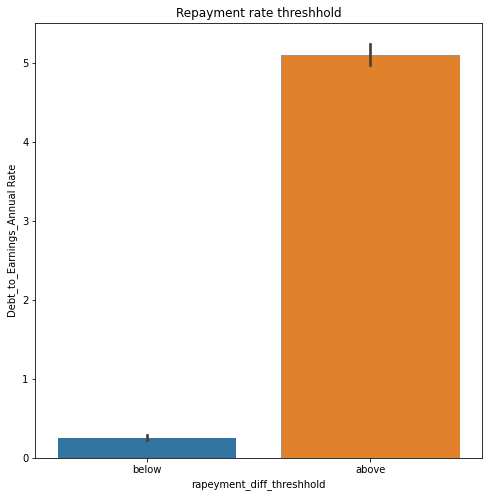

In [16]:
f, ax = plt.subplots(figsize=(8, 8)) 

sns.barplot(x='rapeyment_diff_threshhold',y='Debt_to_Earnings_Annual Rate',data=df)
plt.title('Repayment rate threshhold')
plt.show()

In [0]:
# comparing instutions and programs they offer
df1 = pd.crosstab([df.Institutio_Nname,df.Institution_Type],[df.Credential_Level,df.CIP_Name],rownames=['Instituition','institution type'],colnames=['level','CIP name'],dropna=False)

In [0]:
df1.tail(20)

level                                                                           01 Undergraduate Certificate  \
CIP name                                                   Accounting Technology/Technician and Bookkeeping.   
Instituition                         institution type                                                          
ZAREM /GOLDE ORT TECHNICAL INSTITUTE Foreign 4+ years                                                      0   
                                     Private 2-3 years                                                     1   
                                     Private 4+ years                                                      0   
                                     Private < 2 years                                                     0   
                                     Proprietary 2-3 years                                                 0   
                                     Proprietary 4+ years                                                  0   
                                     Proprietary < 2 years                                                 0   
                                     Public 2-3 years                                                      0   
                                     Public 4+ years                                                       0   
                                     Public < 2 years                                                      0   
ZION BIBLE COLLEGE                   Foreign 4+ years                                                      0   
                                     Private 2-3 years                                                     0   
                                     Private 4+ years                                                      0   
                                     Private < 2 years                                                     0   
                                     Proprietary 2-3 years                                                 0   
                                     Proprietary 4+ years                                                  0   
                                     Proprietary < 2 years                                                 0   
                                     Public 2-3 years                                                      0   
                                     Public 4+ years                                                       0   
                                     Public < 2 years                                                      0   

level                                                                                           \
CIP name                                                   Accounting and Business/Management.   
Instituition                         institution type                                            
ZAREM /GOLDE ORT TECHNICAL INSTITUTE Foreign 4+ years                                        0   
                                     Private 2-3 years                                       0   
                                     Private 4+ years                                        0   
                                     Private < 2 years                                       0   
                                     Proprietary 2-3 years                                   0   
                                     Proprietary 4+ years                                    0   
                                     Proprietary < 2 years                                   0   
                                     Public 2-3 years                                        0   
                                     Public 4+ years                                         0   
                                     Public < 2 years                                        0   
ZION BIBLE COLLEGE                   Foreign 4+ years                                        0   
                                     Private 2-3 ye

In [0]:
# comparing instituion type and the rapayment threshhold
df2 = pd.crosstab([df.Institutio_Nname,df.Institution_Type],[df.Credential_Level,df.rapeyment_diff_threshhold]
                  ,rownames=['Instituition','institution type'],colnames=['level','rapeyment_diff_threshhold'],
                  dropna=False)

In [0]:
df2.head(50)

level                                                                    01 Undergraduate Certificate  \
rapeyment_diff_threshhold                                                                       above   
Instituition                                       institution type                                     
A - TECHNICAL COLLEGE                              Foreign 4+ years                                 0   
                                                   Private 2-3 years                                0   
                                                   Private 4+ years                                 0   
                                                   Private < 2 years                                0   
                                                   Proprietary 2-3 years                            0   
                                                   Proprietary 4+ years                             0   
                                                   Proprietary < 2 years                            0   
                                                   Public 2-3 years                                 0   
                                                   Public 4+ years                                  0   
                                                   Public < 2 years                                 0   
A.B.I. SCHOOL OF BARBERING AND COSMETOLOGY OF C... Foreign 4+ years                                 0   
                                                   Private 2-3 years                                0   
                                                   Private 4+ years                                 0   
                                                   Private < 2 years                                0   
                                                   Proprietary 2-3 years                            0   
                                                   Proprietary 4+ years                             0   
                                                   Proprietary < 2 years                            0   
                                                   Public 2-3 years                                 0   
                                                   Public 4+ years                                  0   
                                                   Public < 2 years                                 0   
AARON'S ACADEMY OF BEAUTY                          Foreign 4+ years                                 0   
                                                   Private 2-3 years                                0   
                                                   Private 4+ years                                 0   
                                                   Private < 2 years                                0   
                                                   Proprietary 2-3 years                            0   
                                                   Proprietary 4+ years                             0   
                                                   Proprietary < 2 years                            1   
                                                   Public 2-3 years                                 0   
                                                   Public 4+ years                                  0   
                                                   Public < 2 years                                 0   
ABC BEAUTY ACADEMY                                 Foreign 4+ years                                 0   
                                                   Private 2-3 years                                0   
                                                   Private 4+ years                                 0   
                                                   Private < 2 years                                0   
                                                   Proprietary 2-3 years                            0   
          

In [0]:
# creating a data frame for Undergraduates only
UnderGraduate = df[df.Credential_Level.str.contains('01 Undergraduate Certificate',case=False)][['OPEID', 'Institutio_Nname', 'Street_Address', 'City', 'State', 'ZIP',
       'Institution_Type', 'CIP_Code', 'CIP_Name', 'Credential_Level',
       'Repayment_Rate', 'Repayment_Rate_Numerator',
       'Repayment_Rate_Denominator', 'Debt_to_Earnings_Annual Rate',
       'Debt to Earnings Annual Rate Numerator',
       'Debt_to_Earnings_Annual_Rate_Denominator',
       'Debt_to_Earnings_Discretionary_Rate',
       'Debt_to_Earnings_Discretionary_Rate_Numerator',
       'Debt_to_Earnings_Discretionary_Rate_Denominator',
       'Median_Private_Loans', 'Median Institution Loans',
       'Median_Title_IV_Loans',
       'Median Title IV Loans (2010-2011 Award Year)','rapeyment_diff_threshhold']]

In [18]:
#  Checking repayment rate  of undergraduates above or below the mean of rapayment rate 
UnderGraduate.rapeyment_diff_threshhold.value_counts()


below    7635
above    2466
Name: rapeyment_diff_threshhold, dtype: int64

In [0]:
# grouping undergraduates based on their institution type
df_UG = UnderGraduate.groupby(['Institution_Type','CIP_Name','rapeyment_diff_threshhold'])


In [20]:
df_UG.first()


OPEID  ... Median Title IV Loans (2010-2011 Award Year)
Institution_Type  CIP_Name                                           rapeyment_diff_threshhold         ...                                             
Foreign 4+ years  Arabic Language and Literature.                    below                       5034  ...                                          0.0
Private 2-3 years Accounting Technology/Technician and Bookkeeping.  below                      41184  ...                                          0.0
                  Accounting.                                        below                      25703  ...                                          0.0
                  Acting.                                            below                      21328  ...                                          0.0
                  Administrative Assistant and Secretarial Scienc... below                      25703  ...                                          0.0
...                                                                                               ...  ...                                          ...
Public < 2 years  Truck and Bus Driver/Commercial Vehicle Operato... below                      41583  ...                                          0.0
                  Veterinary/Animal Health Technology/Technician ... below                      23108  ...                                       5500.0
                  Web Page, Digital/Multimedia and Information Re... below                      12652  ...                                       4132.0
                  Welding Technology/Welder.                         above                      12652  ...                                       3281.0
                                                                     below                      30296  ...                                          0.0

[1637 rows x 21 columns]

In [21]:

UnderGraduate.sort_values(['Repayment_Rate'],ascending=True)


,OPEID,Institutio_Nname,Street_Address,City,State,ZIP,Institution_Type,CIP_Code,CIP_Name,Credential_Level,Repayment_Rate,Repayment_Rate_Numerator,Repayment_Rate_Denominator,Debt_to_Earnings_Annual Rate,Debt to Earnings Annual Rate Numerator,Debt_to_Earnings_Annual_Rate_Denominator,Debt_to_Earnings_Discretionary_Rate,Debt_to_Earnings_Discretionary_Rate_Numerator,Debt_to_Earnings_Discretionary_Rate_Denominator,Median_Private_Loans,Median Institution Loans,Median_Title_IV_Loans,Median Title IV Loans (2010-2011 Award Year),rapeyment_diff_threshhold
1,25410,ALASKA CAREER COLLEGE,1415 E. TUDOR ROAD,ANCHORAGE,AK,995071033,Proprietary 2-3 years,490104,Aviation/Airway Management and Operations.,01 Undergraduate Certificate,0.00,0.0,0.0,1.53,352.0,22946.0,5.68,352.0,6191.0,0.0,0.0,0.0,0.0,below
8859,21721,HAMILTON - FULTON - MONTGOMERY BOCES,2755 STATE HIGHWAY 67,JOHNSTOWN,NY,120950665,Public < 2 years,513901,Licensed Practical/Vocational Nurse Training.,01 Undergraduate Certificate,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,8584.0,5513.0,below
8858,2867,SUNY FULTON-MONTGOMERY COMMUNITY COLLEGE,2805 STATE HIGHWAY 67,JOHNSTOWN,NY,120953790,Public 2-3 years,240101,Liberal Arts and Sciences/Liberal Studies.,01 Undergraduate Certificate,0.00,0.0,0.0,0.00,0.0,23214.0,0.00,0.0,6459.0,0.0,0.0,3167.0,3167.0,below
8854,2869,JAMESTOWN COMMUNITY COLLEGE,525 FALCONER STREET PO BOX 20,JAMESTOWN,NY,147020020,Public 2-3 years,430107,Criminal Justice/Police Science.,01 Undergraduate Certificate,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,below
8853,41480,NEW LIFE BUSINESS INSTITUTE,161-10 JAMAICA AVENUE SUITE 404,JAMAICA,NY,114326149,Proprietary < 2 years,510714,Medical Insurance Specialist/Medical Biller.,01 Undergraduate Certificate,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,419.0,3429.0,3429.0,below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8256,2991,LAKE REGION STATE COLLEGE,1801 COLLEGE DRIVE NORTH,DEVILS LAKE,ND,583011598,Public 2-3 years,430107,Criminal Justice/Police Science.,01 Undergraduate Certificate,93.03,78199.0,84052.0,0.58,241.0,41222.0,0.98,241.0,24467.0,0.0,0.0,3250.0,3250.0,above
2994,1417,UNIVERSITY OF CONNECTICUT,352 MANSFIELD ROAD,STORRS,CT,062692151,Public 4+ years,513801,Registered Nursing/Registered Nurse.,01 Undergraduate Certificate,93.07,384388.0,412999.0,3.31,2175.0,65627.0,4.45,2175.0,48872.0,0.0,0.0,13325.0,4750.0,above
11314,8284,MITCHELL TECHNICAL INSTITUTE,1800 EAST SPRUCE STREET,MITCHELL,SD,573010000,Public 2-3 years,460303,Lineworker.,01 Undergraduate Certificate,93.20,141024.0,151298.0,0.70,362.0,51256.0,1.04,362.0,34501.0,0.0,0.0,5500.0,5500.0,above
934,39745,CALIFORNIA CAREER COLLEGE,7003 OWENSMOUTH AVENUE,CANOGA PARK,CA,913032006,Proprietary < 2 years,511613,Licensed Practical/Vocational Nurse Training (...,01 Undergraduate Certificate,93.21,314518.0,337418.0,1.92,805.0,41919.0,3.19,805.0,25164.0,0.0,0.0,10700.0,8167.0,above


In [22]:
df_4= df.groupby(['Institution_Type','rapeyment_diff_threshhold'])
df_4.first()

OPEID  ... rapeyment_diff
Institution_Type      rapeyment_diff_threshhold         ...               
Foreign 4+ years      above                      22779  ...      39.879895
                      below                      22444  ...     -13.270105
Private 2-3 years     above                      25703  ...      48.719895
                      below                      31052  ...     -13.270105
Private 4+ years      above                      26055  ...      21.559895
                      below                       1033  ...     -13.270105
Private < 2 years     above                      22319  ...      65.699895
                      below                      34593  ...     -13.270105
Proprietary 2-3 years above                      25410  ...      48.859895
                      below                      25410  ...     -13.270105
Proprietary 4+ years  above                      30106  ...      17.209895
                      below                      25769  ...     -13.270105
Proprietary < 2 years above                      33614  ...      16.499895
                      below                      33614  ...     -13.270105
Public 2-3 years      above                       1007  ...       7.309895
                      below                       8988  ...     -13.270105
Public 4+ years       above                       1085  ...      18.059895
                      below                      11462  ...     -13.270105
Public < 2 years      above                      21174  ...      21.899895
                      below                      31603  ...     -13.270105

[20 rows x 23 columns]

In [0]:
# using iloc to craate a datagrame for a specific columns
df_5 = df.iloc[0:13763,[6,24]]


In [24]:
# comparing  comparing institution types categories and their repayment rate
ff=df_5.groupby(['Institution_Type',])
ff.last()
ff_1=ff.rapeyment_diff_threshhold.value_counts()
ff_1




Institution_Type       rapeyment_diff_threshhold
Foreign 4+ years       below                           6
                       above                           1
Private 2-3 years      below                         123
                       above                          43
Private 4+ years       below                         297
                       above                          67
Private < 2 years      below                          61
                       above                          21
Proprietary 2-3 years  above                        1626
                       below                        1399
Proprietary 4+ years   above                        1652
                       below                        1112
Proprietary < 2 years  below                        1313
                       above                         744
Public 2-3 years       below                        4186
                       above                         219
Public 4+ years        below           

* From the above analysis students from Public institutions that offer 2-3 years program are are most likely to be having higher debts since their repayment rate below average are high

* The same scenario is also experienced in Proprietary 2-3 years and Proprietary 4+years programs

In [0]:

# sns.barplot(x='rapeyment_diff_threshhold',y='Institution_Type',data=ff_1)

Text(0.5, 1.0, 'Repayment_density')

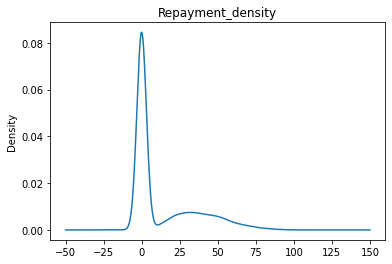

In [25]:
df['Repayment_Rate'].plot.density()
plt.title('Repayment_density')

Repayment density is around zero, reason being the debt measure was not calculated because there were fewer than 31 students in the relevant cohort
From the above repaymen_density,it shows that repayment rate is positively skewed.

In [0]:
# correlation  of varaibles
matrix_cor =df.corr()

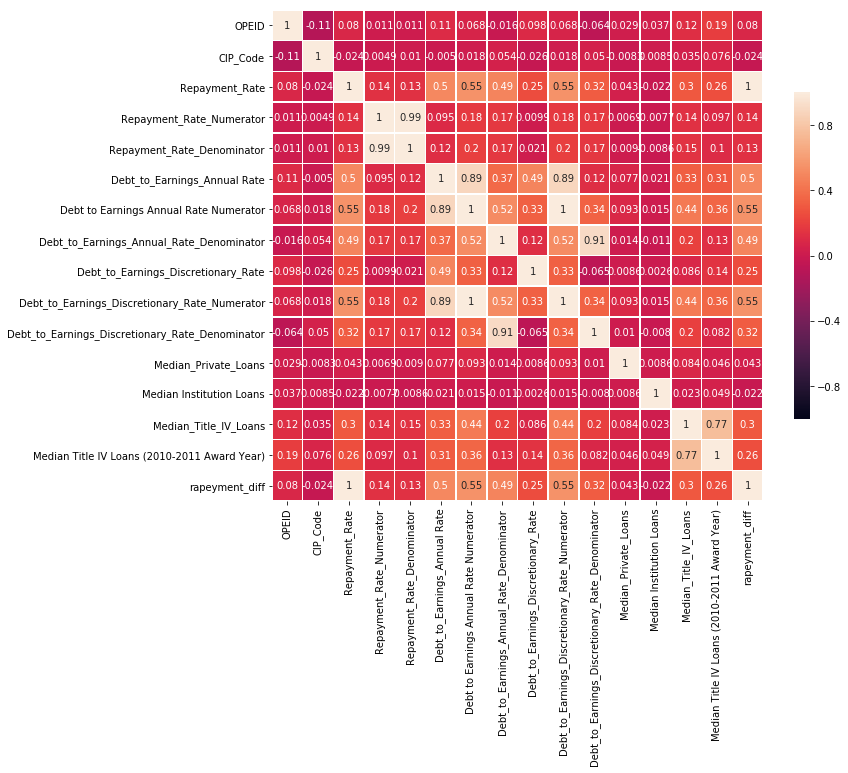

In [0]:
f, ax = plt.subplots(figsize=(11, 15)) 

heatmap = sns.heatmap(matrix_cor,square = True,linewidths = .5, #cmap = ’coolwarm’
                      cbar_kws = {'shrink': .4},vmin = -1,vmax = 1,
                      annot = True)
#add the column names as labels
ax.set_yticklabels(matrix_cor.columns, rotation = 0)
ax.set_xticklabels(matrix_cor.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [0]:
df3 = df.groupby(['Institution_Type','CIP_Name','Institutio_Nname',
                  'Repayment_Rate'])[['Repayment_Rate']].count().sort_values(by='Institution_Type',ascending=False)
df3.tail(50)

Repayment_Rate
Institution_Type  CIP_Name                                           Institutio_Nname                                   Repayment_Rate                
Private 4+ years  Medical/Clinical Assistant.                        REMINGTON COLLEGE - TAMPA CAMPUS                   9.95                         1
                  Music, General.                                    BERKLEE COLLEGE OF MUSIC                           74.36                        1
                  Nursing, Other.                                    COLLEGE OF SAINT MARY                              36.40                        1
                  Medical/Clinical Assistant.                        REMINGTON COLLEGE - COLORADO SPRINGS CAMPUS        34.22                        1
                  Nursing/Registered Nurse (RN, ASN, BSN, MSN).      ST. CATHERINE UNIVERSITY                           84.69                        1
Private 2-3 years Medical/Clinical Assistant.                        CASA LOMA COLLEGE                                  37.24                        1
                  Instrumentation Technology/Technician.             PERRY TECHNICAL INSTITUTE                          71.26                        1
                  Medical Insurance Coding Specialist/Coder.         REMINGTON COLLEGE - CLEVELAND CAMPUS               21.64                        1
                                                                     REMINGTON COLLEGE - HOUSTON CAMPUS                 18.87                        1
                  Nursing, Other.                                    ST MARGARET MEMORIAL HOSPITAL SCHOOL OF NURSING    51.15                        1
                  Medical/Clinical Assistant.                        REMINGTON COLLEGE - CLEVELAND CAMPUS               16.59                        1
                                                                     REMINGTON COLLEGE - HOUSTON CAMPUS                 18.42                        1
                  Nursing/Registered Nurse (RN, ASN, BSN, MSN).      JAMESON MEMORIAL HOSPITAL SCHOOL OF NURSING        82.10                        1
                  Heating, Air Conditioning, Ventilation and Refr... ORLEANS TECHNICAL INSTITUTE                        41.61                        1
                                                                     PERRY TECHNICAL INSTITUTE                          62.75                        1
                  Carpentry/Carpenter.                               ORLEANS TECHNICAL INSTITUTE                        25.24                        1
                  Emergency Medical Technology/Technician (EMT Pa... CENTRO DE ESTUDIOS MULTIDISCIPLINARIOS             8.07                         1
                  Electrician.                                       PERRY TECHNICAL INSTITUTE                          67.20                        1
                                                                     ORLEANS TECHNICAL INSTITUTE                        28.33                        1
                  Dental Assisting/Assistant.                        REMINGTON COLLEGE - CLEVELAND CAMPUS               26.54                        1
                  Criminal Justice/Law Enforcement Administration.   LACKAWANNA COLLEGE                                 65.87                        1
                  Communications Systems Installation and Repair ... PERRY TECHNICAL INSTITUTE                          51.66                        1
                  Commercial and Advertising Art.                    PERRY TECHNICAL INSTITUTE                          52.80                        1
                  Building/Property Maintenance.                     ORLEANS TECHNICAL INSTITUTE                        28.77                        1
                  Automobile/Automotive Mechanics Technology/Tech... ROSEDALE TECHNICAL INSTITUTE                       18.97                        1
                  Nursing/Registered Nurse (RN, ASN, BSN, M

From the above observations medical related programs tend to have lower repayment rate as compared to other programs.

In [0]:
# Checking the mean of repayment rate of medical  related programs
med = df[df.CIP_Name.str.contains('Medical',case=False)][['Institution_Type','CIP_Name','Institutio_Nname','Repayment_Rate']].copy()

In [27]:
print('Repayment rate mean of medical program',med.Repayment_Rate.mean())

Repayment rate mean of medical program 12.220436917034863


In [28]:
# Checking the mean of repayment rate of technical  programs

Technical = df[df.CIP_Name.str.contains('Technician',case=False)][['Institution_Type','CIP_Name','Institutio_Nname','Repayment_Rate']].copy()
Technical.Repayment_Rate.mean()

9.560401351922264

In [29]:
# Checking the mean of repayment rate of nursing  programs

Nurse = df[df.CIP_Name.str.contains('Nurse',case=False)][['Institution_Type','CIP_Name','Institutio_Nname','Repayment_Rate']].copy()
Nurse.Repayment_Rate.mean()

16.657859327217142